In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('transaction-data-adhoc-analysis.json','r') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)

In [4]:
# check dataframe
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [5]:
# clean up granularity
df['transaction_items'].str.split(';')
df['transaction_items'] = df['transaction_items'].map(str)

In [6]:
# clean up granularity
df['transaction_items'].str.split(';')

0                      [Exotic Extras,Beef Chicharon,(x4)]
1        [Exotic Extras,Beef Chicharon,(x3), HealthyKid...
2        [HealthyKid 3+,Gummy Vitamins,(x3), HealthyKid...
3                    [HealthyKid 3+,Yummy Vegetables,(x1)]
4        [Candy City,Orange Beans,(x3), Candy City,Gumm...
                               ...                        
83031    [Exotic Extras,Kimchi and Seaweed,(x2), Health...
83032    [HealthyKid 3+,Yummy Vegetables,(x1), Exotic E...
83033    [Candy City,Orange Beans,(x4), Candy City,Gumm...
83034    [HealthyKid 3+,Nutrional Milk,(x2), Candy City...
83035    [HealthyKid 3+,Nutrional Milk,(x1), Candy City...
Name: transaction_items, Length: 83036, dtype: object

In [7]:
# clean up granularity
df['transaction_items'] = df['transaction_items'].str.split(';')

In [8]:
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"[Exotic Extras,Beef Chicharon,(x4)]",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"[HealthyKid 3+,Gummy Vitamins,(x3), HealthyKid...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"[HealthyKid 3+,Yummy Vegetables,(x1)]",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"[Candy City,Orange Beans,(x3), Candy City,Gumm...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"[Exotic Extras,Kimchi and Seaweed,(x2), Health...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"[HealthyKid 3+,Yummy Vegetables,(x1), Exotic E...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"[Candy City,Orange Beans,(x4), Candy City,Gumm...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"[HealthyKid 3+,Nutrional Milk,(x2), Candy City...",4280,2022/06/09


In [9]:
# clean up granularity
df2 = df.explode('transaction_items')

In [10]:
# check which month was the transaction done
df2['January'] = df2['transaction_date'].str.contains('2022/01')
df2['February'] = df2['transaction_date'].str.contains('2022/02')
df2['March'] = df2['transaction_date'].str.contains('2022/03')
df2['April'] = df2['transaction_date'].str.contains('2022/04')
df2['May'] = df2['transaction_date'].str.contains('2022/05')
df2['June'] = df2['transaction_date'].str.contains('2022/06')

In [11]:
# check if the columns were made
df2.columns

Index(['address', 'birthdate', 'mail', 'name', 'sex', 'username',
       'transaction_items', 'transaction_value', 'transaction_date', 'January',
       'February', 'March', 'April', 'May', 'June'],
      dtype='object')

In [12]:
# new 
df2.explode('transaction_items')

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,January,February,March,April,May,June
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,True,False,False,False,False,False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,True,False,False,False,False,False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12,True,False,False,False,False,False
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,True,False,False,False,False,False
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022/06/09,False,False,False,False,False,True
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,False,False,False,False,False,True
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022/06/03,False,False,False,False,False,True
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,False,False,False,False,False,True


In [13]:
# take advantage of the fact that true = 1 and false = 0
# now combine all the customers by name and get the sum of the true-false month columns
df3 = df2.reset_index().groupby("name").sum()

In [14]:
df3

,index,transaction_value,January,February,March,April,May,June
name,,,,,,,,
Aaron Beasley,440290,27962,0,0,0,4,3,1
Aaron Brewer,561000,87728,2,2,1,3,0,5
Aaron Brown,754235,95067,0,0,5,5,3,1
Aaron Coffey,718397,71808,1,3,4,4,5,0
Aaron Davis,1221551,101521,2,1,0,6,8,5
...,...,...,...,...,...,...,...,...
Zachary Valentine,1102496,127963,3,3,3,2,5,8
Zachary Ware,1256817,154584,3,4,6,2,7,4
Zachary Williams,828120,148885,10,8,7,5,0,0


In [15]:
# if it is greater than 0, then it means they bought something that month
# compare the two months
jan = df3['January'] > 0 
feb = df3['February'] > 0
mar = df3['March'] > 0
apr = df3['April'] > 0
may = df3['May'] > 0
jun = df3['June'] > 0

df3['January Status'] = (jan)
df3['February Status'] = (jan) & (feb)
df3['March Status'] = (feb) & (mar)
df3['April Status'] = (mar) & (apr)
df3['May Status'] = (apr) & (may)
df3['June Status'] = (may) & (jun)

In [16]:
df3

,index,transaction_value,January,February,March,April,May,June,January Status,February Status,March Status,April Status,May Status,June Status
name,,,,,,,,,,,,,,
Aaron Beasley,440290,27962,0,0,0,4,3,1,False,False,False,False,True,True
Aaron Brewer,561000,87728,2,2,1,3,0,5,True,True,True,True,False,False
Aaron Brown,754235,95067,0,0,5,5,3,1,False,False,False,True,True,True
Aaron Coffey,718397,71808,1,3,4,4,5,0,True,True,True,True,True,False
Aaron Davis,1221551,101521,2,1,0,6,8,5,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zachary Valentine,1102496,127963,3,3,3,2,5,8,True,True,True,True,True,True
Zachary Ware,1256817,154584,3,4,6,2,7,4,True,True,True,True,True,True
Zachary Williams,828120,148885,10,8,7,5,0,0,True,True,True,True,False,False


In [17]:
# new dataframe
df4 = df3[['January Status', 'February Status', 'March Status', 'April Status', 'May Status', 'June Status']].copy()

In [18]:
df4

,January Status,February Status,March Status,April Status,May Status,June Status
name,,,,,,
Aaron Beasley,False,False,False,False,True,True
Aaron Brewer,True,True,True,True,False,False
Aaron Brown,False,False,False,True,True,True
Aaron Coffey,True,True,True,True,True,False
Aaron Davis,True,True,False,False,True,True
...,...,...,...,...,...,...
Zachary Valentine,True,True,True,True,True,True
Zachary Ware,True,True,True,True,True,True
Zachary Williams,True,True,True,True,False,False


In [19]:
# get the repeaters for february, march, april, may, june... january = 0

JanRepeaters = 0
print('The number of repeaters for January:', JanRepeaters)

# February
FebRepeaters = df4['February Status'].sum()
print('The number of repeaters for February: ', FebRepeaters)

# March
MarRepeaters = df4['March Status'].sum()
print('The number of repeaters for March: ', MarRepeaters)

# April
AprRepeaters = df4['April Status'].sum()
print('The number of repeaters for April: ', AprRepeaters)

# May
MayRepeaters = df4['May Status'].sum()
print('The number of repeaters for May: ', MayRepeaters)

# June
JunRepeaters = df4['June Status'].sum()
print('The number of repeaters for June: ', JunRepeaters)

The number of repeaters for January: 0
The number of repeaters for February:  5172
The number of repeaters for March:  5216
The number of repeaters for April:  5154
The number of repeaters for May:  5110
The number of repeaters for June:  5193


In [20]:
# make a new dataframe for inactive
df5 = df3[['January Status', 'February Status', 'March Status', 'April Status', 'May Status', 'June Status']].copy()

In [21]:
df5

,January Status,February Status,March Status,April Status,May Status,June Status
name,,,,,,
Aaron Beasley,False,False,False,False,True,True
Aaron Brewer,True,True,True,True,False,False
Aaron Brown,False,False,False,True,True,True
Aaron Coffey,True,True,True,True,True,False
Aaron Davis,True,True,False,False,True,True
...,...,...,...,...,...,...
Zachary Valentine,True,True,True,True,True,True
Zachary Ware,True,True,True,True,True,True
Zachary Williams,True,True,True,True,False,False


In [22]:
# get the inactive for february, march, april, may, june... january = 0
# if it is greater than 0, then it means they bought something that month
# compare the two months
jan = df3['January'] > 0 
feb = df3['February'] > 0
mar = df3['March'] > 0
apr = df3['April'] > 0
may = df3['May'] > 0
jun = df3['June'] > 0

# [ has bought anything ever ] AND [ has not bought anything the current month ]

df5['February Inactive'] = (jan) & (df3['February'] == 0)
df5['March Inactive'] = ((jan) | (feb)) & (df3['March'] == 0)
df5['April Inactive'] = ((jan) | (feb) | (mar)) & (df3['April'] == 0)
df5['May Inactive'] = ((jan) | (feb) | (mar) | (apr)) & (df3['May'] == 0)
df5['June Inactive'] = ((jan) | (feb) | (mar) | (apr) | (may)) & (df3['June'] == 0)

In [23]:
df5

,January Status,February Status,March Status,April Status,May Status,June Status,February Inactive,March Inactive,April Inactive,May Inactive,June Inactive
name,,,,,,,,,,,
Aaron Beasley,False,False,False,False,True,True,False,False,False,False,False
Aaron Brewer,True,True,True,True,False,False,False,False,False,True,False
Aaron Brown,False,False,False,True,True,True,False,False,False,False,False
Aaron Coffey,True,True,True,True,True,False,False,False,False,False,True
Aaron Davis,True,True,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Zachary Valentine,True,True,True,True,True,True,False,False,False,False,False
Zachary Ware,True,True,True,True,True,True,False,False,False,False,False
Zachary Williams,True,True,True,True,False,False,False,False,False,True,True


In [24]:
JanInactive = 0
print('The number of inactive for January: ', JanInactive)

# February
FebInactive = df5['February Inactive'].sum()
print('The number of Inactive for February: ', FebInactive)

# March
MarInactive = df5['March Inactive'].sum()
print('The number of Inactive for March: ', MarInactive)

# April
AprInactive = df5['April Inactive'].sum()
print('The number of Inactive for April: ', AprInactive)

# May
MayInactive = df5['May Inactive'].sum()
print('The number of Inactive for May: ', MayInactive)

# June
JunInactive = df5['June Inactive'].sum()
print('The number of Inactive for June: ', JunInactive)

The number of inactive for January:  0
The number of Inactive for February:  1416
The number of Inactive for March:  1747
The number of Inactive for April:  1909
The number of Inactive for May:  1917
The number of Inactive for June:  1835


In [25]:
# make a new dataframe for engaged
df6 = df3[['January', 'February', 'March', 'April', 'May', 'June']].copy()

In [26]:
df6

,January,February,March,April,May,June
name,,,,,,
Aaron Beasley,0,0,0,4,3,1
Aaron Brewer,2,2,1,3,0,5
Aaron Brown,0,0,5,5,3,1
Aaron Coffey,1,3,4,4,5,0
Aaron Davis,2,1,0,6,8,5
...,...,...,...,...,...,...
Zachary Valentine,3,3,3,2,5,8
Zachary Ware,3,4,6,2,7,4
Zachary Williams,10,8,7,5,0,0


In [27]:
# get the engaged for january, february, march, april, may, june
# if it is greater than 0, then it means they bought something that month
# compare the all months applicable
jan = df6['January'] > 0 
feb = df6['February'] > 0
mar = df6['March'] > 0
apr = df6['April'] > 0
may = df6['May'] > 0
jun = df6['June'] > 0

# consistently purchased every single month: [ has always bought ] AND [ has bought the current month ] 
df6['January Engaged'] = (jan)
df6['February Engaged'] = (jan) & (feb)
df6['March Engaged'] = (jan) & (feb) & (mar)
df6['April Engaged'] = (jan) & (feb) & (mar) & (apr)
df6['May Engaged'] = (jan) & (feb) & (mar) & (apr) & (may)
df6['June Engaged'] = (jan) & (feb) & (mar) & (apr) & (may) & (jun)

In [28]:
df6

,January,February,March,April,May,June,January Engaged,February Engaged,March Engaged,April Engaged,May Engaged,June Engaged
name,,,,,,,,,,,,
Aaron Beasley,0,0,0,4,3,1,False,False,False,False,False,False
Aaron Brewer,2,2,1,3,0,5,True,True,True,True,False,False
Aaron Brown,0,0,5,5,3,1,False,False,False,False,False,False
Aaron Coffey,1,3,4,4,5,0,True,True,True,True,True,False
Aaron Davis,2,1,0,6,8,5,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Zachary Valentine,3,3,3,2,5,8,True,True,True,True,True,True
Zachary Ware,3,4,6,2,7,4,True,True,True,True,True,True
Zachary Williams,10,8,7,5,0,0,True,True,True,True,False,False


In [29]:
# January
JanEngaged = df6['January Engaged'].sum()
print('The number of Engaged for February: ', JanEngaged)

# February
FebEngaged = df6['February Engaged'].sum()
print('The number of Engaged for February: ', FebEngaged)

# March
MarEngaged = df6['March Engaged'].sum()
print('The number of Engaged for March: ', MarEngaged)

# April
AprEngaged = df6['April Engaged'].sum()
print('The number of Engaged for April: ', AprEngaged)

# May
MayEngaged = df6['May Engaged'].sum()
print('The number of Engaged for May: ', MayEngaged)

# June
JunEngaged = df6['June Engaged'].sum()
print('The number of Engaged for June: ', JunEngaged)

The number of Engaged for February:  6588
The number of Engaged for February:  5172
The number of Engaged for March:  4126
The number of Engaged for April:  3289
The number of Engaged for May:  2667
The number of Engaged for June:  2190


In [30]:
# clean-up data to a new dict
data={'January':[ JanRepeaters, JanInactive ,JanEngaged],
      'February':[ FebRepeaters, FebInactive, FebEngaged],
      'March': [ MarRepeaters, MarInactive, MarEngaged],
      'April': [ AprRepeaters, AprInactive, AprEngaged],
      'May': [ MayRepeaters ,MayInactive, MayEngaged],
      'June': [ JunRepeaters ,JunInactive, JunEngaged],
     }

dfMetrics=pd.DataFrame(data, index=['Repeaters','Inactive','Engaged'])

In [31]:
# table with repeaters, inactive, and engaged
dfMetrics

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


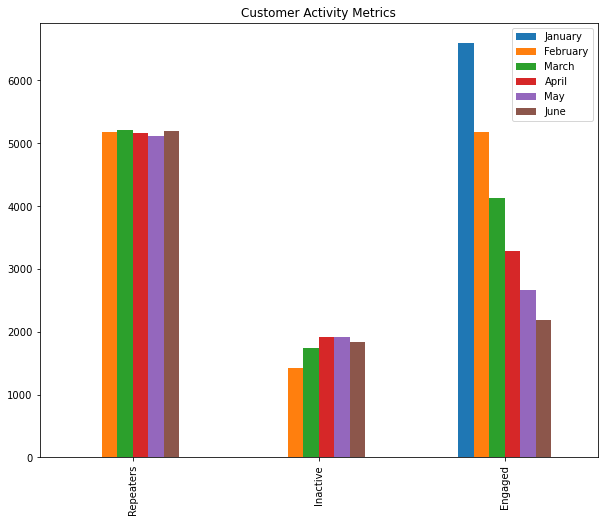

In [33]:
# make bar graph to show the differences
bar = dfMetrics.plot.bar(figsize =(10,8), title = 'Customer Activity Metrics')

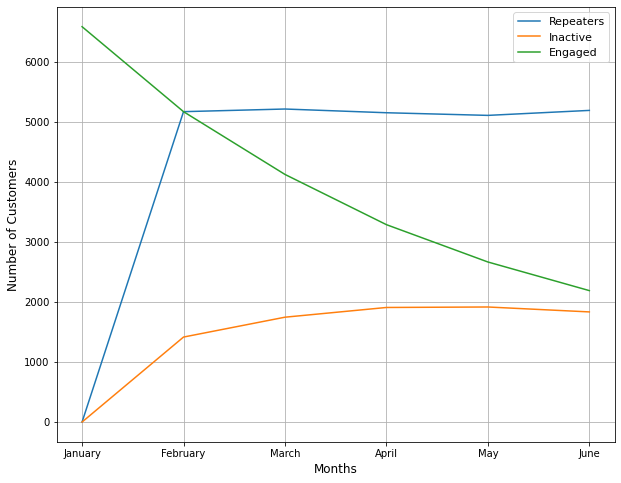

In [42]:
# make a line graph to show trends
ax = dfMetrics.T.plot(figsize=(10, 8))
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_xlabel('Months', fontsize=12)
plt.rc('legend', fontsize=11)
plt.legend()
plt.grid(True)
plt.show()